In [1]:
import json
import matplotlib.pyplot as plt
import glob
import numpy as np
import subtitleprocessing


import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

# set up figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 22})


<IPython.core.display.Javascript object>

In [2]:
ref_data_dir = '/Users/lantonel/SilverTongue/training_dataset/'
reference_srts = [file for file in glob.glob(ref_data_dir + '*.srt')]
#print reference_srts
reference_txts = []
for srt in reference_srts:
    subs = subtitleprocessing.srt_to_sub(srt)
    txt = subtitleprocessing.sub_to_txt(srt, subs)
    reference_txts.append(txt)
#print reference_txts

In [3]:
user_data_dir = '/Users/lantonel/SilverTongue/fellow_dataset/'
user_urls = ['YckvYUlESxs', # denis week 2 demo
             'evewg5TAdfc', # jamie week 2 demo
             'J7DyWcA5U48', # jamie week 1 demo
             'ZCGEMI3Saug', # patrick week 2 demo
             'U4rGFXM0Z4I', # sean week 2 demo
             'U3T2eI_5VOE', # wes week 2 demo
            ]
user_labels = ['Denis 2',
               'Jamie 2',
               'Jamie 1',
               'Patrick 2',
               'Sean 2',
               'Wes 2',             
              ]
user_srts = [user_data_dir+user_url+'.en.srt' for user_url in user_urls]
user_txts = [user_data_dir+user_url+'.en.txt' for user_url in user_urls]

#print user_txts

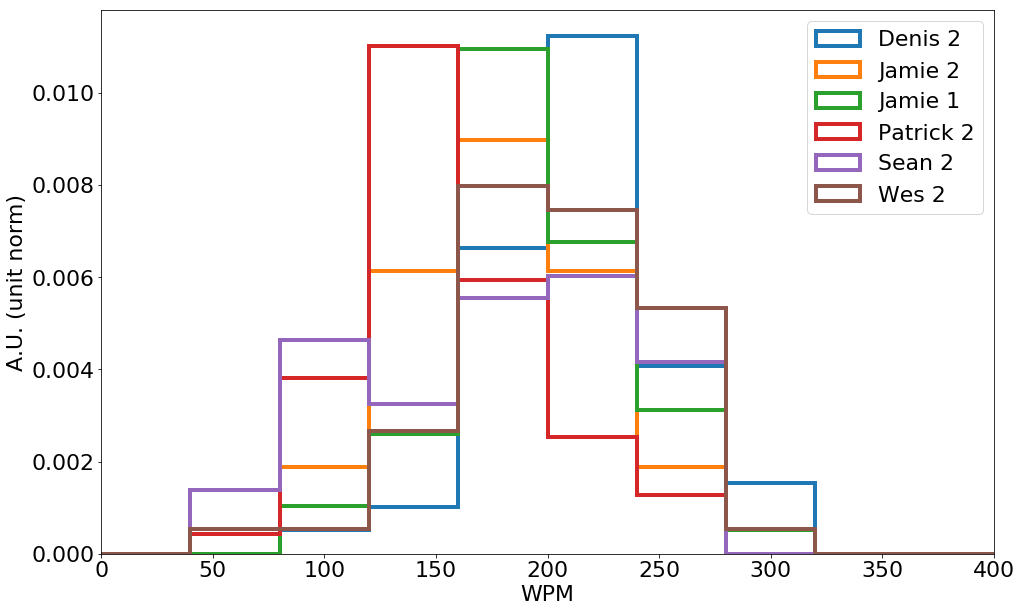

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
wpm_max = 400
# let's average over ~5 second intervals, that should reduce the high WPM tail
for i, ref in enumerate(user_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end

    plot = plt.hist(wpms, 
                10, 
                range=[0, wpm_max], 
                histtype='step',
                stacked=False,
                alpha=1,
                normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                linewidth=4,
                label=user_labels[i]
               )

leg = plt.legend(loc=1)
axes = plt.gca()
axes.set_xlabel("WPM")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(0,wpm_max)
plt.show()

213.076068905
177.031618052
192.837867597
156.904463826
176.696052982
202.904747148


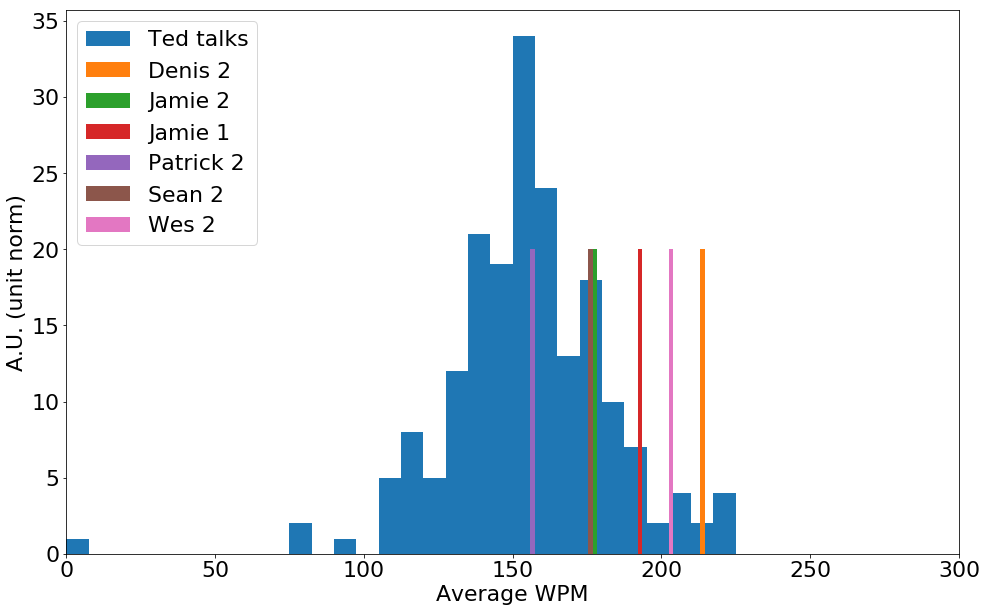

In [5]:
means = []
wpm_max = 300

# make distributions of average WPM
for i, ref in enumerate(reference_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end

    mean = np.mean(wpms)
    means.append(mean)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plot = plt.hist(means, 
                40, 
                range=[0, wpm_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label='Ted talks'
               )


for i, ref in enumerate(user_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end
    mean = np.mean(wpms)
    print mean
    plot = plt.hist([mean], 
                200, 
                range=[0, wpm_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                weights = [20],
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label=user_labels[i]
               )

leg = plt.legend(loc=2)
axes = plt.gca()
axes.set_xlabel("Average WPM")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(0,wpm_max)
plt.show()

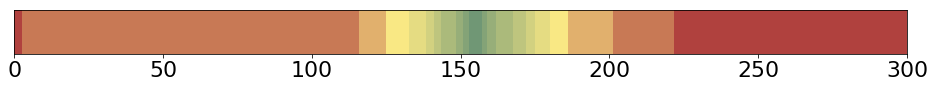

In [6]:
colors = ['#B0413E','#C87955','#E1B06D','#F9E884','#E5DC82','#D2D180','#BEC57E','#ABBA7B','#97AE79','#84A377','#709775']

colors.extend(list(reversed(colors)))
center = np.percentile(means, 50)
bin_percentiles = [(100./(len(colors)-2))*i for i in range(len(colors)-1)]

bin_edges = [np.percentile(means, i) for i in bin_percentiles]
widths = [bin_edges[0]]
for i in range(1,len(bin_edges)):
    widths.append(bin_edges[i]-bin_edges[i-1])
widths.append(wpm_max-bin_edges[-1])
weights = [[width] for width in widths]
data = [[1] for width in widths]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 0.8
plt.rcParams["figure.figsize"] = fig_size

plt.hist(data, weights = weights, bins=1, color = colors, orientation="horizontal", stacked=True)
ax = plt.gca()
ax.set_xlim(0,wpm_max)
ax.set_ylim(0.8,1.2)
ax.get_yaxis().set_visible(False)
#ax.get_xaxis().set_visible(False)
plt.show()

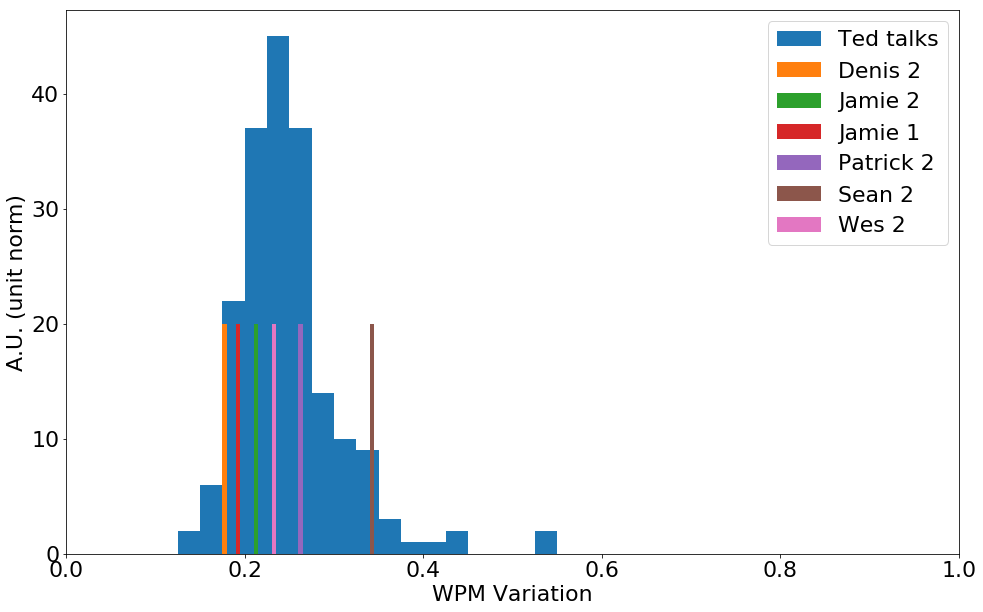

In [7]:
variations = []
variation_max = 1

# make distributions of average WPM
for i, ref in enumerate(reference_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end
    rms = np.std(wpms)
    mean = np.mean(wpms)
    variations.append(rms/mean)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plot = plt.hist(variations, 
                40, 
                range=[0, variation_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label='Ted talks'
               )


for i, ref in enumerate(user_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end
    rms = np.std(wpms)
    mean = np.mean(wpms)
    variation = rms/mean

    plot = plt.hist([variation], 
                200, 
                range=[0, variation_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                weights = [20],
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label=user_labels[i]
               )

leg = plt.legend(loc=1)
axes = plt.gca()
axes.set_xlabel("WPM Variation")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(0,variation_max)
plt.show()

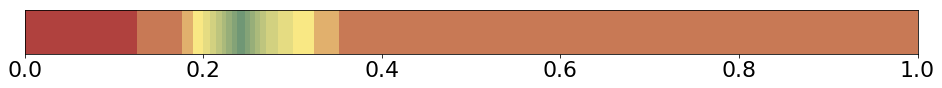

In [8]:
colors = ['#B0413E','#C87955','#E1B06D','#F9E884','#E5DC82','#D2D180','#BEC57E','#ABBA7B','#97AE79','#84A377','#709775']

colors.extend(list(reversed(colors)))
center = np.percentile(variations, 50)
bin_percentiles = [(100./(len(colors)-2))*i for i in range(len(colors)-1)]
bin_edges = [np.percentile(variations, i) for i in bin_percentiles]
widths = [bin_edges[0]]
for i in range(1,len(bin_edges)):
    widths.append(bin_edges[i]-bin_edges[i-1])
widths.append(variation_max-bin_edges[-1])
weights = [[width] for width in widths]
data = [[1] for width in widths]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 0.8
plt.rcParams["figure.figsize"] = fig_size

plt.hist(data, weights = weights, bins=1, color = colors, orientation="horizontal", stacked=True)
ax = plt.gca()
ax.set_xlim(0,variation_max)
ax.set_ylim(0.8,1.2)
ax.get_yaxis().set_visible(False)
#ax.get_xaxis().set_visible(False)
plt.show()

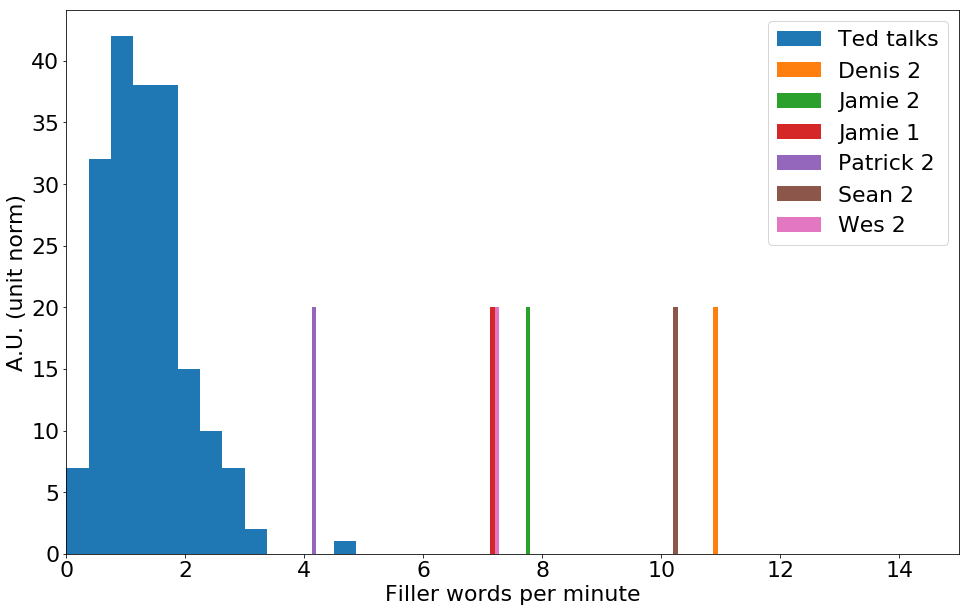

In [9]:
rates = []
rate_max = 15

# common filler word tagging
words_to_check = ['so','like','um','okay','just']

for i, ref in enumerate(zip(reference_srts,reference_txts)):
    subs = subtitleprocessing.srt_to_sub(ref[0])
    total_time = (subs[-1].end - subs[0].start).total_seconds()
    with open(ref[1], 'r') as myfile:
        txt=myfile.read()
    txt_words = txt.split()
    num_fillers = 0
    for word in words_to_check:
        num_fillers += txt_words.count(word)
    filler_rate = num_fillers/(total_time/60.)
    rates.append(filler_rate)
    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plot = plt.hist(rates, 
                40, 
                range=[0, rate_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label='Ted talks'
               )

for i, ref in enumerate(zip(user_srts,user_txts)):
    subs = subtitleprocessing.srt_to_sub(ref[0])
    total_time = (subs[-1].end - subs[0].start).total_seconds()
    with open(ref[1], 'r') as myfile:
        txt=myfile.read()
    txt_words = txt.split()
    num_fillers = 0
    for word in words_to_check:
        num_fillers += txt_words.count(word)
    filler_rate = num_fillers/(total_time/60.)

    plot = plt.hist([filler_rate], 
                200, 
                range=[0, rate_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                weights = [20],
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label=user_labels[i]
               )

leg = plt.legend(loc=1)
axes = plt.gca()
axes.set_xlabel("Filler words per minute")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(0,rate_max)
plt.show()

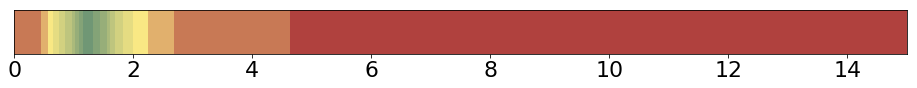

In [10]:
colors = ['#B0413E','#C87955','#E1B06D','#F9E884','#E5DC82','#D2D180','#BEC57E','#ABBA7B','#97AE79','#84A377','#709775']

colors.extend(list(reversed(colors)))
center = np.percentile(rates, 50)
bin_percentiles = [(100./(len(colors)-2))*i for i in range(len(colors)-1)]
bin_edges = [np.percentile(rates, i) for i in bin_percentiles]
widths = [bin_edges[0]]
for i in range(1,len(bin_edges)):
    widths.append(bin_edges[i]-bin_edges[i-1])
widths.append(rate_max-bin_edges[-1])
weights = [[width] for width in widths]
data = [[1] for width in widths]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 0.8
plt.rcParams["figure.figsize"] = fig_size

plt.hist(data, weights = weights, bins=1, color = colors, orientation="horizontal", stacked=True)
ax = plt.gca()
ax.set_xlim(0,rate_max)
ax.set_ylim(0.8,1.2)
ax.get_yaxis().set_visible(False)
#ax.get_xaxis().set_visible(False)
plt.show()

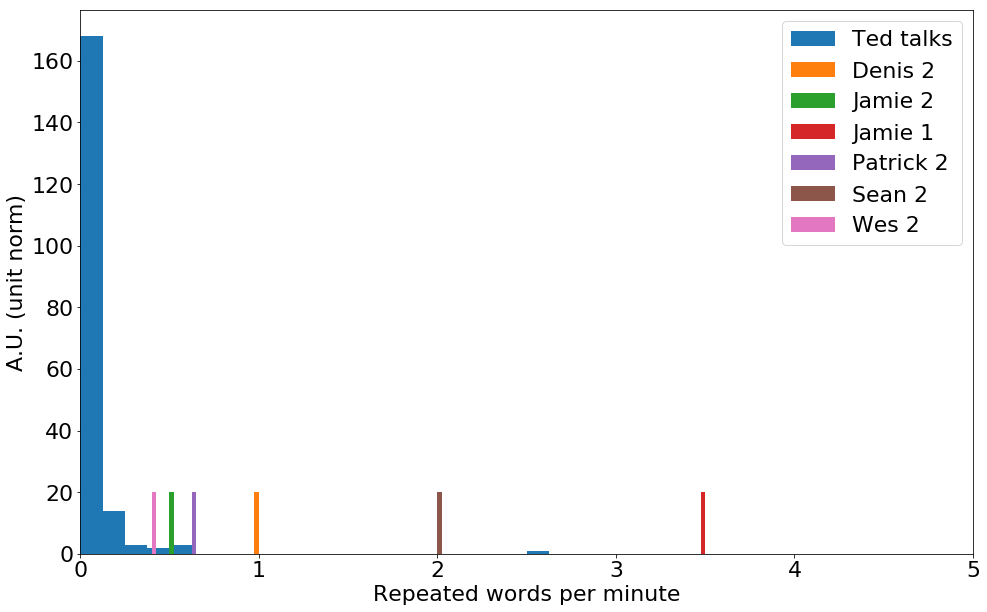

In [11]:
rates = []
rate_max = 5

#repeated word tagger
for i, ref in enumerate(zip(reference_srts,reference_txts)):
    subs = subtitleprocessing.srt_to_sub(ref[0])
    total_time = (subs[-1].end - subs[0].start).total_seconds()
    with open(ref[1], 'r') as myfile:
        txt=myfile.read()
    txt_words = txt.split()
    num_repeats = 0
    for j,word in enumerate(txt_words[:-1]):
        if word == txt_words[j+1]:
            num_repeats += 1
    repeat_rate = num_repeats/(total_time/60.)
    rates.append(repeat_rate)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plot = plt.hist(rates, 
                40, 
                range=[0, rate_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label='Ted talks'
               )

for i, ref in enumerate(zip(user_srts,user_txts)):
    subs = subtitleprocessing.srt_to_sub(ref[0])
    total_time = (subs[-1].end - subs[0].start).total_seconds()
    with open(ref[1], 'r') as myfile:
        txt=myfile.read()
    txt_words = txt.split()
    num_repeats = 0
    for j,word in enumerate(txt_words[:-1]):
        if word == txt_words[j+1]:
            num_repeats += 1
    repeat_rate = num_repeats/(total_time/60.)
    plot = plt.hist([repeat_rate], 
                200, 
                range=[0, rate_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                weights = [20],
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label=user_labels[i]
               )

leg = plt.legend(loc=1)
axes = plt.gca()
axes.set_xlabel("Repeated words per minute")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(0,rate_max)
plt.show()

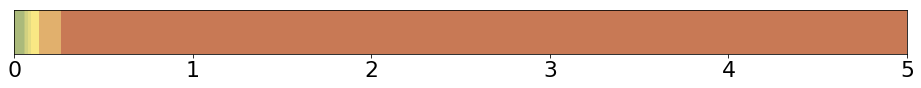

In [12]:
colors = ['#B0413E','#C87955','#E1B06D','#F9E884','#E5DC82','#D2D180','#BEC57E','#ABBA7B','#97AE79','#84A377','#709775']

colors.extend(list(reversed(colors)))
center = np.percentile(rates, 50)
bin_percentiles = [(100./(len(colors)-2))*i for i in range(len(colors)-1)]
bin_edges = [np.percentile(rates, i) for i in bin_percentiles]
widths = [bin_edges[0]]
for i in range(1,len(bin_edges)):
    widths.append(bin_edges[i]-bin_edges[i-1])
widths.append(rate_max-bin_edges[-1])
weights = [[width] for width in widths]
data = [[1] for width in widths]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 0.8
plt.rcParams["figure.figsize"] = fig_size

plt.hist(data, weights = weights, bins=1, color = colors, orientation="horizontal", stacked=True)
ax = plt.gca()
ax.set_xlim(0,rate_max)
ax.set_ylim(0.8,1.2)
ax.get_yaxis().set_visible(False)
#ax.get_xaxis().set_visible(False)
plt.show()

In [13]:
#repeated word tagger
for i, ref in enumerate(zip(user_srts,user_txts)):
    subs = subtitleprocessing.srt_to_sub(ref[0])
    total_time = (subs[-1].end - subs[0].start).total_seconds()
    with open(ref[1], 'r') as myfile:
        txt=myfile.read()
    txt_words = txt.split()
    num_repeats = 0
    for i,word in enumerate(txt_words[:-1]):
        if word == txt_words[i+1]:
            print '\t',' '.join(txt_words[i-2:i+2])
            num_repeats += 1
    repeat_rate = num_repeats/(total_time/60.)
#    print user_labels[i]
#    print '\t\t', repeat_rate

	vision of the the
	and see what what
	humidity but the the
	and then the the
	wait I'm in in
	start with the the
	am at the the
	at least on on
	Geoffrey Rush to to
	courses are pretty pretty
	my goal with with
	to use the the
	a dashboard with with
	sort of a a
	cup of the the
	get tips from from
	feedback on your your
	really looking for for
	off and the the
	at once is is
	is is the the
	terms of the the
	so at the the
	it thanks and and
	talks so that's that's
	people's feedback on on
	Consulting for a a
	delicious food so so
	arrive at it it
	customer engagement will will
	it says here's here's
	doing basically is is
	doing that so so
	identify entities within within
	future directions so so
	aggregating over so so
	actually agree with with
	that yet so so
	what happens if if
	we'll see so so
	with this in in
	about things like like
	maker watch is is
	well on the the


In [14]:
# common filler word tagging
words_to_check = ['so','like','um','okay','just']

for i, ref in enumerate(zip(user_srts,user_txts)):
    
    subs = subtitleprocessing.srt_to_sub(ref[0])
    total_time = (subs[-1].end - subs[0].start).total_seconds()
    with open(ref[1], 'r') as myfile:
        txt=myfile.read()
    txt_words = txt.split()
    words_to_check = txt_words
    num_fillers = 0
    word_counts = {}
    for word in words_to_check:
        word_counts[word] = txt_words.count(word)
        num_fillers += txt_words.count(word)
    filler_rate = num_fillers/(total_time/60.)

#    print user_labels[i]
#    print '---------------'
#    for k,v in sorted(word_counts.items(), key=lambda p:p[1], reverse=True):
#        print k,v
#    print
#    print 
    